In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline

In [2]:
import pandas as pd

In [12]:
all_features = pd.read_pickle("loaded_features.pkl")

In [17]:
imputed_data = all_features.apply(lambda x: x.fillna(x.median()), axis = 0)
imputed_data.head()

,DMDCITZN,DMDEDUC2,DMDFMSIZ,DMDHHSIZ,DMDHRAGE,DMDHREDU,DMDHRGND,DMDHRMAR,DMDHSEDU,DMDMARTL,...,INQ150,FSD032A,FSD032B,FSD032C,FSD151,FSDAD,FSDHH,OCD150,OCD390G,MCQ220
SEQN,,,,,,,,,,,,,,,,,,,,,
2.0,1.0,5.0,3.0,1.0,77.0,5.0,1.0,1.0,4.0,1.0,...,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
5.0,1.0,5.0,3.0,3.0,42.0,4.0,2.0,1.0,4.0,1.0,...,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
7.0,1.0,2.0,3.0,1.0,59.0,2.0,2.0,1.0,4.0,1.0,...,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
10.0,1.0,3.0,3.0,1.0,43.0,3.0,1.0,4.0,4.0,4.0,...,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
12.0,1.0,4.0,3.0,4.0,32.0,2.0,2.0,1.0,5.0,5.0,...,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0


In [39]:
X = imputed_data.drop(["MCQ220"], axis = 1).values
y = imputed_data["MCQ220"].values

In [40]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn.preprocessing import normalize

In [44]:
X = normalize(X, axis = 0)
print(np.amax(X))
print(np.amin(X))

0.5679687285959242
4.2290108368547294e-86


Computing regularization path using the lasso...


/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: Conv

Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...


/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Artem/anaconda/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: Conv

Computing regularization path using the positive elastic net...


(3.073374495685713, 5.604507490916093, -6.973923189512677, 21.69200340522131)

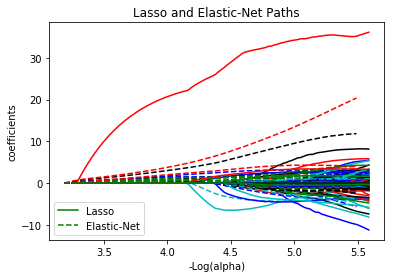

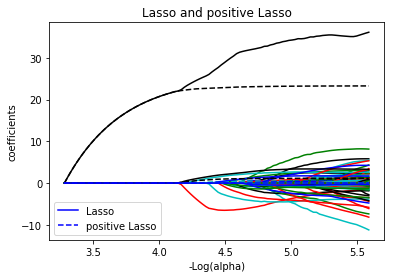

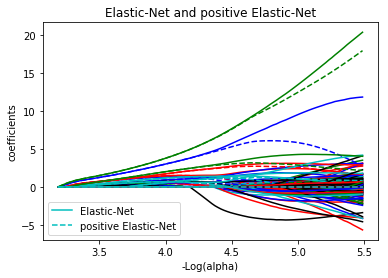

In [45]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')

In [46]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
clf = linear_model.Lasso()
selector = RFE(clf, 50, step=10)
selector = selector.fit(X, y)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [47]:
imputed_data.columns[:-1][selector.support_]

Index(['DR1TATOC', 'DR1TB12A', 'DR1TBCAR', 'DR1TCAFF', 'DR1TCALC', 'DR1TCARB',
       'DR1TCHOL', 'DR1TCOPP', 'DR1TCRYP', 'DR1TFA', 'DR1TFDFE', 'DR1TFF',
       'DR1TFIBE', 'DR1TFOLA', 'DR1TIRON', 'DR1TKCAL', 'DR1TLYCO', 'DR1TLZ',
       'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TMAGN', 'DR1TMFAT',
       'DR1TMOIS', 'DR1TNIAC', 'DR1TNUMF', 'DR1TP184', 'DR1TP204', 'DR1TS080',
       'IND235', 'INDFMMPC', 'INDFMMPI', 'INQ012', 'INQ020', 'INQ030',
       'INQ060', 'INQ080', 'INQ090', 'INQ132', 'INQ140', 'INQ150', 'FSD032A',
       'FSD032B', 'FSD032C', 'FSD151', 'FSDAD', 'FSDHH', 'OCD150', 'OCD390G'],
      dtype='object')

In [48]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 50, step=10)
selector = selector.fit(X, y)
selector.support_

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [49]:
imputed_data.columns[:-1][selector.support_]

Index(['DMDHRAGE', 'DMQMILIT', 'FIAPROXY', 'RIDAGEYR', 'DR1HELPD', 'DR1TKCAL',
       'DR1TM161', 'DR1TS100', 'DR1TS140', 'DR1TSUGR', 'DR2HELPD', 'DR2TNIAC',
       'DR2TPROT', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ', 'BPAEN2', 'BPXPTY',
       'BPXSY2', 'BMXARMC', 'BMXARML', 'BMXHT', 'LBXHBS', 'LBDLYMNO',
       'LBDMONO', 'LBDNENO', 'LBXLYPCT', 'LBXMCHSI', 'LBXMOPCT', 'LBXMPSI',
       'LBXNEPCT', 'LBXRBCSI', 'LBXRDW', 'PHQ050', 'PHQ060', 'LBDSCASI',
       'LBDSTPSI', 'LBXSCA', 'LBXSNASI', 'LBXSTP', 'BPQ040A', 'BPQ050A',
       'HSQ510', 'KIQ022', 'MCQ010', 'MCQ160N', 'PAQ620', 'PFQ059', 'SXQ260',
       'HUQ090'],
      dtype='object')